## Process Phage Scope 
Start my analysing the output with the categories to see how many phages have many annotations etc and relate this to how well annotated the phages are 

In [60]:
# imports 
import pandas as pd
import pickle
import glob
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
chunk_names = glob.glob('/home/grig0076/scratch/Phynteny_transformer/PhageScope/0genelimit/*')
phage_details = {}

for c in chunk_names: 
    
    print(c)
    c_data = pickle.load(open(c + '/data.data.pkl', 'rb'))
    phage_details =  phage_details | c_data
    print('merged!')

In [89]:
# save this pickle to a dictionary 
pickle.dump(phage_details, open('/home/grig0076/scratch/Phynteny_transformer/PhageScope/0genelimit/all_phages.pkl', 'wb'))

In [ ]:
phage_details = pickle.load(open('/home/grig0076/scratch/Phynteny_transformer/PhageScope/0genelimit/all_phages.pkl', 'rb'))

### gather data on each genome

In [115]:
keys = list(phage_details.keys())
lengths = [phage_details.get(i).get('length') for i in keys]
category_count = [len(list(set(phage_details.get(i).get('categories')))) for i in keys]
notunknown_categories = [list(set([j for j in phage_details.get(i).get('categories') if j != -1])) for i in keys]
notunknown_category_count = [len(list(set([j for j in phage_details.get(i).get('categories') if j != -1]))) for i in keys]
gene_count = [len(phage_details.get(i).get('categories')) for i in keys]
known_gene_count = [len(list([j for j in phage_details.get(i).get('categories') if j != -1])) for i in keys]

In [116]:
genome_details_df = pd.DataFrame({'Phage_ID': keys, 'length': lengths, 'category count': category_count, 'not unknown categories': notunknown_categories, 
                                  'not unknown category count': notunknown_category_count,
                                  'gene_count': gene_count, 'known_gene_count': known_gene_count})

In [117]:
genome_details_df.to_csv('/home/grig0076/scratch/Phynteny_transformer/PhageScope/0genelimit/phage_genome_features.tsv', sep = '\t')

In [118]:
# read in the phage scope metadata 
phagescope = pd.read_csv('/home/grig0076/scratch/databases/PhageScope/all_metadata.tsv', sep = '\t')
phagescope = pd.merge(phagescope, genome_details_df, on = 'Phage_ID' , how = 'left')
phagescope = phagescope[phagescope['Phage_ID'] != 'Phage_ID']
phagescope['Length'] = [int(i) for i in phagescope['Length']]
phagescope['no known genes'] = [1 if i == 0 else 0 for i in  phagescope['not unknown category count']] 

phagescope_representatives = phagescope.drop_duplicates(subset = ['Subcluster'])

<ipython-input-118-1d3ee9047117>:2: DtypeWarning: Columns (1,2,9) have mixed types. Specify dtype option on import or set low_memory=False.
  phagescope = pd.read_csv('/home/grig0076/scratch/databases/PhageScope/all_metadata.tsv', sep = '\t')


In [121]:
phagescope

,Phage_ID,Length,GC_content,Taxonomy,Completeness,Host,Lifestyle,Cluster,Subcluster,Phage_source,length,category count,not unknown categories,not unknown category count,gene_count,known_gene_count,no known genes
0,SRS101376_a1_ct99314_vs01,31763,50.51160154897208,Myoviridae,High-quality,Gemmiger,virulent,cluster_33392,subcluster_40629,CHVD,31763.0,8.0,"[0, 1, 2, 3, 4, 6, 7]",7.0,56.0,17.0,0
1,SRS101388_a1_ct42327_vs01,223331,42.42133873040464,Myoviridae,High-quality,Neisseria,virulent,cluster_340704,subcluster_411447,CHVD,223331.0,5.0,"[2, 3, 4, 7]",4.0,183.0,37.0,0
2,SRS101376_a1_ct26874_vs01,25835,52.89723243661699,Myoviridae,Low-quality,-,virulent,cluster_208857,subcluster_251798,CHVD,25835.0,7.0,"[1, 2, 3, 6, 7, 8]",6.0,35.0,20.0,0
3,SAMEA1906416_a1_ct13001,53468,40.51582254806613,Siphoviridae,High-quality,Lachnospiraceae,virulent,cluster_243648,subcluster_294650,CHVD,53468.0,8.0,"[0, 2, 3, 4, 6, 7, 8]",7.0,91.0,15.0,0
4,SAMEA1906416_a1_ct130485_vs1,23523,61.65880202355142,Siphoviridae,Medium-quality,Bifidobacterium,virulent,cluster_44056,subcluster_53753,CHVD,23523.0,5.0,"[1, 2, 3, 7]",4.0,37.0,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873726,TemPhD_cluster_9995,70356,37.232077,Caudovirales,Medium-quality,Listeria monocytogenes,temperate,cluster_87031,subcluster_109673,NaN,70356.0,7.0,"[0, 2, 3, 5, 6, 8]",6.0,76.0,16.0,0
873727,TemPhD_cluster_9996,70356,37.232077,Caudovirales,Medium-quality,Listeria monocytogenes,temperate,cluster_87031,subcluster_109681,NaN,70356.0,7.0,"[0, 2, 3, 5, 6, 8]",6.0,76.0,16.0,0
873728,TemPhD_cluster_9997,70356,37.233498,Caudovirales,Medium-quality,Listeria monocytogenes,temperate,cluster_87031,subcluster_109687,NaN,70356.0,7.0,"[0, 2, 3, 5, 6, 8]",6.0,76.0,16.0,0
873729,TemPhD_cluster_9998,70357,37.232969,Caudovirales,Medium-quality,Listeria monocytogenes,temperate,cluster_87031,subcluster_109690,NaN,70357.0,7.0,"[0, 2, 3, 5, 6, 8]",6.0,76.0,16.0,0


## Genome length  

<AxesSubplot:xlabel='Length', ylabel='Count'>

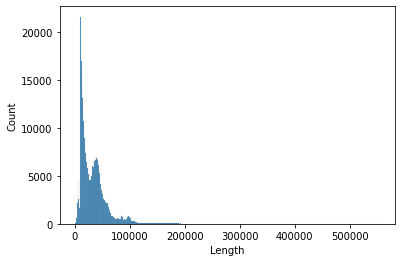

In [81]:
sns.histplot(data=phagescope_representatives, x = 'Length') 

## Compare number in each completeness category before and after mmseqs clustering

Seems like the high-quality ones are duplicated most - this makes sense becuase this is what is present in databases

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

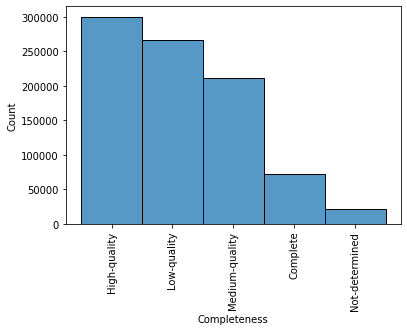

In [82]:
sns.histplot(data = phagescope, x = "Completeness")
plt.xticks(rotation=90) 

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

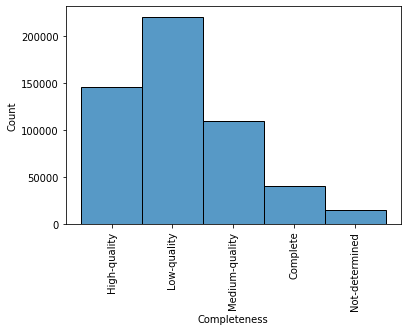

In [83]:
sns.histplot(data = phagescope_representatives, x = "Completeness")
plt.xticks(rotation=90) 

## Compare the length across categories
Low quality are mostly very short

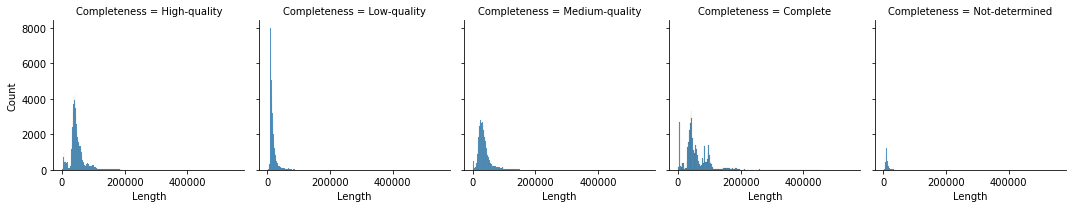

In [84]:
g = sns.FacetGrid(phagescope_representatives,  col="Completeness")
g.map_dataframe(sns.histplot,x= 'Length' )

# Compare the length and the number of genes called

<AxesSubplot:xlabel='Length', ylabel='gene_count'>

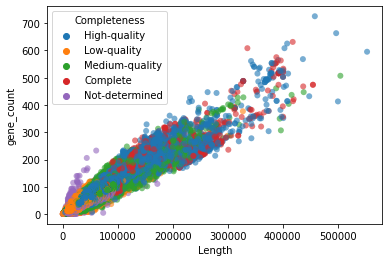

In [85]:
sns.scatterplot(data=phagescope_representatives, x = 'Length', y='gene_count', hue = 'Completeness', linewidth=0, alpha=0.6)

<AxesSubplot:xlabel='Length', ylabel='gene_count'>

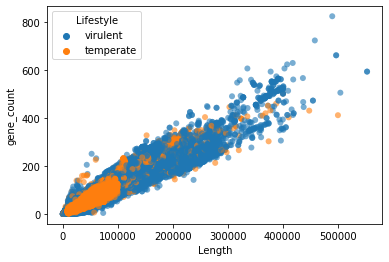

In [37]:
sns.scatterplot(data=phagescope_representatives, x = 'Length', y='gene_count', hue = 'Lifestyle', linewidth=0, alpha=0.6)

<AxesSubplot:xlabel='Length', ylabel='gene_count'>

/home/grig0076/miniconda3/envs/notebook_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


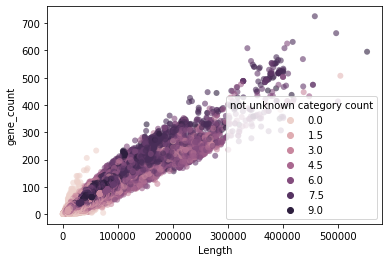

In [86]:
sns.scatterplot(data=phagescope_representatives, x = 'Length', y='gene_count', hue = 'not unknown category count', linewidth=0, alpha=0.6)

<AxesSubplot:xlabel='Length', ylabel='gene_count'>

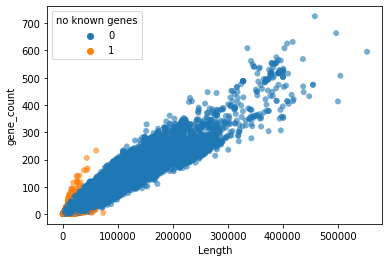

In [87]:
sns.scatterplot(data=phagescope_representatives, x = 'Length', y='gene_count', hue = 'no known genes', linewidth=0, alpha=0.6)

<AxesSubplot:xlabel='gene_count', ylabel='known_gene_count'>

/home/grig0076/miniconda3/envs/notebook_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


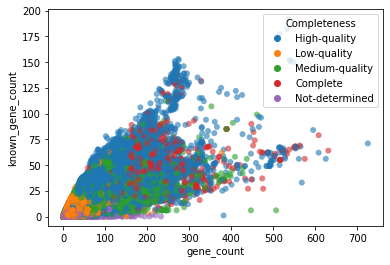

In [131]:
sns.scatterplot(data=phagescope_representatives, x = 'gene_count', y='known_gene_count', hue = 'Completeness', linewidth=0, alpha = 0.6)


A lot of the 'not determined' phages are not annotated with known genes - these should just be excluded then 

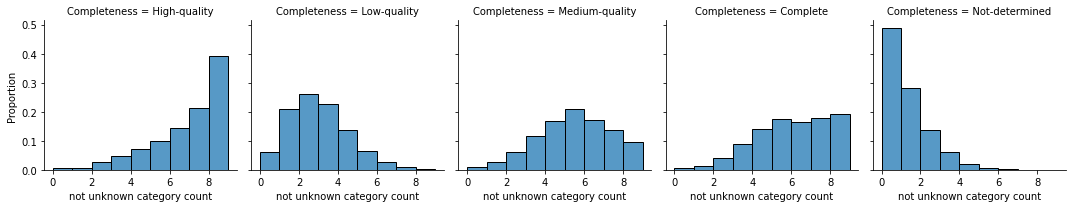

In [88]:
g = sns.FacetGrid(phagescope_representatives,  col="Completeness")
g.map_dataframe(sns.histplot ,x= 'not unknown category count', binwidth=1, stat='proportion')

Next: repeat this with a representative from each cluster 

## Perform filtering 
Remove any phages from the 'not determined' category with checkV 

In [168]:
phagescope_filtered = phagescope_representatives[~phagescope_representatives['Completeness'].isin(['Not-determined', 'Low-quality'])]

<AxesSubplot:xlabel='not unknown category count', ylabel='Count'>

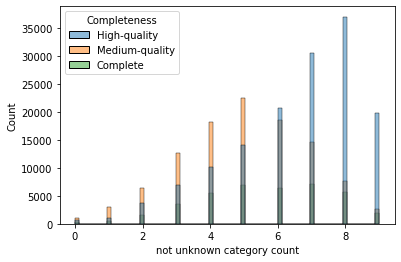

In [169]:
sns.histplot(data=phagescope_filtered, x = 'not unknown category count', hue = 'Completeness')

In [170]:
phagescope_filtered = phagescope_filtered[phagescope_filtered['no known genes'] == 0]

also remove phages with less than a total of 5 genes. Otherwise model won't be able to learn to pay attention to at least two neighbours either side

In [173]:
phagescope_filtered = phagescope_filtered[phagescope_filtered['gene_count'] > 4]

<AxesSubplot:xlabel='gene_count', ylabel='known_gene_count'>

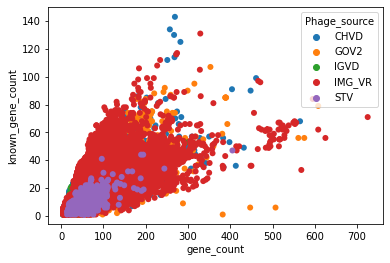

In [188]:
sns.scatterplot(data=phagescope_filtered, x = 'gene_count', y = 'known_gene_count', linewidth=0, hue = 'Phage_source')

<AxesSubplot:xlabel='gene_count', ylabel='known_gene_count'>

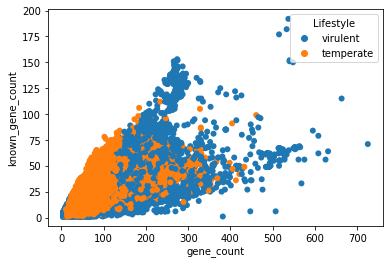

In [190]:
sns.scatterplot(data=phagescope_filtered, x = 'gene_count', y = 'known_gene_count', linewidth=0, hue = 'Lifestyle')

In [185]:
phagescope_filtered

,Phage_ID,Length,GC_content,Taxonomy,Completeness,Host,Lifestyle,Cluster,Subcluster,Phage_source,length,category count,not unknown categories,not unknown category count,gene_count,known_gene_count,no known genes
0,SRS101376_a1_ct99314_vs01,31763,50.51160154897208,Myoviridae,High-quality,Gemmiger,virulent,cluster_33392,subcluster_40629,CHVD,31763.0,8.0,"[0, 1, 2, 3, 4, 6, 7]",7.0,56.0,17.0,0
1,SRS101388_a1_ct42327_vs01,223331,42.42133873040464,Myoviridae,High-quality,Neisseria,virulent,cluster_340704,subcluster_411447,CHVD,223331.0,5.0,"[2, 3, 4, 7]",4.0,183.0,37.0,0
3,SAMEA1906416_a1_ct13001,53468,40.51582254806613,Siphoviridae,High-quality,Lachnospiraceae,virulent,cluster_243648,subcluster_294650,CHVD,53468.0,8.0,"[0, 2, 3, 4, 6, 7, 8]",7.0,91.0,15.0,0
4,SAMEA1906416_a1_ct130485_vs1,23523,61.65880202355142,Siphoviridae,Medium-quality,Bifidobacterium,virulent,cluster_44056,subcluster_53753,CHVD,23523.0,5.0,"[1, 2, 3, 7]",4.0,37.0,13.0,0
5,SAMEA1906416_a1_ct135852_vs1,24662,53.66555834887682,Myoviridae,Medium-quality,Faecalibacterium,virulent,cluster_167646,subcluster_201838,CHVD,24662.0,5.0,"[8, 2, 4, 7]",4.0,39.0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873612,TemPhD_cluster_9892,33682,50.905528,Caudovirales,High-quality,Escherichia coli,temperate,cluster_44432,subcluster_55750,NaN,33682.0,9.0,"[0, 1, 2, 3, 4, 6, 7, 8]",8.0,44.0,32.0,0
873613,TemPhD_cluster_9893,33682,50.902559,Caudovirales,High-quality,Escherichia coli,temperate,cluster_44432,subcluster_55751,NaN,33682.0,9.0,"[0, 1, 2, 3, 4, 6, 7, 8]",8.0,44.0,32.0,0
873625,TemPhD_cluster_9903,33682,50.908497,Caudovirales,High-quality,Escherichia coli,temperate,cluster_44432,subcluster_55754,NaN,33682.0,9.0,"[0, 1, 2, 3, 4, 6, 7, 8]",8.0,44.0,32.0,0
873672,TemPhD_cluster_9946,43193,46.542264,Caudovirales,High-quality,Salmonella enterica,temperate,cluster_212119,subcluster_266857,NaN,43193.0,10.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8]",9.0,66.0,37.0,0


In [191]:
phagescope_filtered.to_csv('/home/grig0076/scratch/Phynteny_transformer/PhageScope/phagescope_filtered_subcluster_numgenes_20122024.tsv', sep = '\t')